오차 제곱 합
 (150*a + b - 45)**2 + (155*a + b - 50)**2 + (165*a + b - 55)**2 + (170*a + b - 65)**2 + (175*a + b - 70)**2 + (180*a + b - 80)**2

a에 대해 편미분:  331350*a + 1990*b - 122550
b에 대해 편미분:  1990*a + 12*b - 730

a는 1.1118, b는 -123.5404


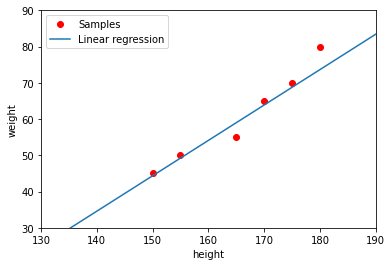

키  190 인 사람의 몸무게:  87.70186335403773
None


In [2]:
import sympy as sym
import numpy as np

file = open("Linear_regression.txt", 'r')
a1 = file.readline()
list_a1 = a1.split(' ')
b1 = file.readline()
list_b1 = b1.split(' ')
c1 = file.readline()
list_c1 = c1.split(' ')
d1 = file.readline()
list_d1 = d1.split(' ')
e1 = file.readline()
list_e1 = e1.split(' ')
f1 = file.readline()
list_f1 = f1.split(' ')

a = sym.Symbol('a')
b = sym.Symbol('b')

# int형으로 바꿔줌 
for i in range(2):
    list_a1[i] = (int)(list_a1[i])
    list_b1[i] = (int)(list_b1[i])
    list_c1[i] = (int)(list_c1[i])
    list_d1[i] = (int)(list_d1[i])
    list_e1[i] = (int)(list_e1[i])
    list_f1[i] = (int)(list_f1[i])

# 각 샘플에 대한 오차
ra1 = a*list_a1[0] + b - list_a1[1]
rb1 = a*list_b1[0] + b - list_b1[1]
rc1 = a*list_c1[0] + b - list_c1[1]
rd1 = a*list_d1[0] + b - list_d1[1]
re1 = a*list_e1[0] + b - list_e1[1]
rf1 = a*list_f1[0] + b - list_f1[1]

R2 = ra1**2 + rb1**2 + rc1**2 + rd1**2 + re1**2 + rf1**2  # 오차 제곱 합
print("오차 제곱 합\n", R2)

ra = sym.diff(R2, a) # a에 대해 편미분
print("\na에 대해 편미분: ", ra)
rb = sym.diff(R2, b)  # b에 대해 편미분
print("b에 대해 편미분: ", rb)

# 편미분한 각 식의 상수들 
z1 = -float(ra.subs({a: 0, b: 0}))
z2 = -float(rb.subs({a: 0, b: 0}))
zlist = [[z1], [z2]] 

# 편미분한 각 식의 a 계수
x1 = float(sym.diff(ra, a))
x2 = float(sym.diff(rb, a))

# 편미분한 각 식의 b 계수
y1 = float(sym.diff(ra, b))
y2 = float(sym.diff(rb, b))

rlist = [[x1, y1], [x2, y2]]
ablist = [[a], [b]]

# 행렬로 계산
inv_r = np.linalg.inv(rlist) 
result = np.dot(inv_r, zlist)
print('\na는 %.4f, b는 %.4f' %(result[0], result[1]))

# 2차원 그래프
from matplotlib import pyplot as plt

x = [list_a1[0], list_b1[0], list_c1[0], list_d1[0], list_e1[0], list_f1[0]]  # 각 샘플들의 키
y = [list_a1[1], list_b1[1], list_c1[1], list_d1[1], list_e1[1], list_f1[1]]  # 각 샘플들의 몸무게

plt.plot(x,y,'ro')

plt.plot([0,190],[-102.2,83.421])

plt.xlabel('height')

plt.ylabel('weight')

plt.xlim([130,190])

plt.ylim([30,90])

plt.legend(['Samples', 'Linear regression'])

plt.show()


def checkpoint(ca):
    weight = float(result[0]*ca + result[1])
    print("키 ", ca, "인 사람의 몸무게: ", weight)

print(checkpoint(190))